# Simulated Annealing Lab

*Student: Lisa KOPPE*

*Course: TU3 - Applied Data Science & Artificial Intelligence - Metaheuristics*

*Due date: Tuesday, 21 January 2020, 3:00 PM*

### Introduction

In this lab you will write a program for simulated annealing. You will test the program on a one-dimensional fitness surface with multiple local maxima. In addition you will use this surface to study the effects of various annealing parameters on search efficiency. You will then adapt the code to optimize a neural network to oscillate.

In [1]:
#import required packages
from __future__ import print_function, division #enables latest features regardless of Python version
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import optimize
import math
from pandas import DataFrame

### Exercise 1

The goal of simulated annealing is to maximize the performance of a model relative to a fitness function defined over the model parameters you are seeking to optimize. 

In Exercise 2, **you will apply simulated annealing coded in scipy** to a one-dimensional problem in which you seek the value of X that maximizes the output of a function called **fitnessFunction**. But first you must write code that implements the function, which is the product of m and n:

$m = 1 + cos(0.04v)^2$

$n = exp(−v^2 / (20000))$

Paste your function into your lab report.

In [2]:
#implementation of the function 'fitnessFunction' which is the product of m an n
def fitnessFunction(v):
    m = 1 + np.cos(0.04 * v) ** 2
    n = np.exp(-v**2 / 20000)
    prod = m * n
    return prod

### Exercise 2

Display the fitness surface. To do this, make the wave fitness with 1000 points starting at x
= -500 and ending at x = 500 (using Data > Change Wave Scaling). Set the yvalues in fitness to the corresponding value of the fitnessFunction(). Display fitness and include the graph in your lab report.

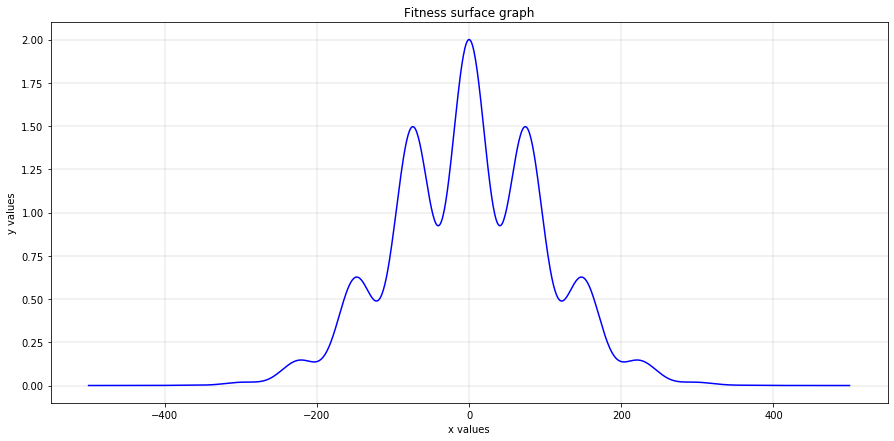

In [3]:
#display the fitness surface
#we use numpy linspace function to return 1000 evenly spaced points, calculated over the interval [-500, 500]
x_val = np.linspace(-500, 500, num=1000, endpoint=True) 
y_val = fitnessFunction(x_val)

#configuration of matplotlib plotting parameters
fig = plt.figure(figsize=(15, 7))
plt.plot(x_val, y_val, color='b')
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(color='gray', linestyle='-', linewidth=0.2)
plt.xlabel('x values')
plt.ylabel('y values')
plt.title("Fitness surface graph")

plt.show()

### Exercise 3

Run the algorithm with an **initial X value of 250** and an **initial temperature of 10**. Plot the trajectory of the annealing algorithm along the fitness surface, include the graph in your lab report.

Slowly increase the temperature until you find the peak about 90% of the time. Report this temperature and explain its significance in terms of the relationship between the search radius and the dimensions of the width of the fitness curve.

In [4]:
#implementation of the annealing algorithm
def simulated_annealing(start,
                        cost_function,
                        random_neighbour,
                        acceptance,
                        temperature,
                        maxsteps=1000,
                        debug=True):
    """Optimize the black-box function 'cost_function' with the simulated annealing algorithm."""
    state = start()
    cost = cost_function(state)
    states, costs = [state], [cost]
    for step in range(maxsteps):
        fraction = step / float(maxsteps)
        T = temperature(fraction, temp_init)
        new_state = random_neighbour(state, fraction)
        new_cost = cost_function(new_state)
        if (debug == True): 
            print("Step #{:>2}/{:>2} : T = {:>4.3g}, state = {:>4.3g}, cost = {:>4.3g}, new_state = {:>4.3g}, new_cost = {:>4.3g} ...".format(step, maxsteps, T, state, cost, new_state, new_cost))
        if acceptance_probability(cost, new_cost, T) >= rn.random():
            state, cost = new_state, new_cost
            states.append(state)
            costs.append(cost)
    return state, cost_function(state), states, costs

In [5]:
#definition of the interval
interval = (-500, 500)

#implementation of the functions used by the annealing algorithm
def clip(x_val):
    """Force x_val to remain in the interval."""
    a, b = interval
    return max(min(x_val, b), a)

def start():
    """Fixed start at 250""" 
    return 250

def cost_function(x_val):
    """Cost of x_val = f(x_val)."""
    return fitnessFunction(x_val)

def random_neighbour(x_val, fraction=1):
    """Move sligthly x_val towards righ-handside or left-handside."""
    amplitude = (max(interval) - min(interval)) * fraction / 5
    delta = (-amplitude/2.) + amplitude * rn.random_sample()
    return clip(x_val + delta)

def acceptance_probability(cost, new_cost, temperature):
    """Look for the global maximum -> maximize the function."""
    if new_cost > cost: 
        return 1
    else:
        p = np.exp(- (cost - new_cost) / temperature)  
        return p

def temperature(fraction, temp_init):
    """Temperature initially set at 10, with update to ensure it goes to 0 at max_steps."""
    return max(0.01, min(temp_init, temp_init - temp_init * fraction))

In [6]:
#run the annealing algorithm with an initial temperature of 10
temp_init = 10
res = simulated_annealing(start, 
                          cost_function, 
                          random_neighbour, 
                          acceptance_probability, 
                          temperature, 
                          maxsteps=30, 
                          debug=True);

Step # 0/30 : T =   10, state =  250, cost = 0.0749, new_state =  250, new_cost = 0.0749 ...
Step # 1/30 : T = 9.67, state =  250, cost = 0.0749, new_state =  248, new_cost = 0.0827 ...
Step # 2/30 : T = 9.33, state =  248, cost = 0.0827, new_state =  246, new_cost = 0.0875 ...
Step # 3/30 : T =    9, state =  246, cost = 0.0875, new_state =  240, new_cost = 0.112 ...
Step # 4/30 : T = 8.67, state =  240, cost = 0.112, new_state =  242, new_cost = 0.105 ...
Step # 5/30 : T = 8.33, state =  242, cost = 0.105, new_state =  235, new_cost = 0.127 ...
Step # 6/30 : T =    8, state =  235, cost = 0.127, new_state =  250, new_cost = 0.0753 ...
Step # 7/30 : T = 7.67, state =  250, cost = 0.0753, new_state =  252, new_cost = 0.0667 ...
Step # 8/30 : T = 7.33, state =  252, cost = 0.0667, new_state =  268, new_cost = 0.0293 ...
Step # 9/30 : T =    7, state =  268, cost = 0.0293, new_state =  256, new_cost = 0.0545 ...
Step #10/30 : T = 6.67, state =  256, cost = 0.0545, new_state =  269, new_c

In [7]:
#add more steps -> maxsteps=1000
state, cost, states, costs = simulated_annealing(start,
                                              cost_function,
                                              random_neighbour,
                                              acceptance_probability,
                                              temperature,
                                              maxsteps=1000,
                                              debug=False)

print("Last state: ", state)
print("Last cost: ", cost)

Last state:  1.7006792311061645
Last cost:  1.9950908964484866


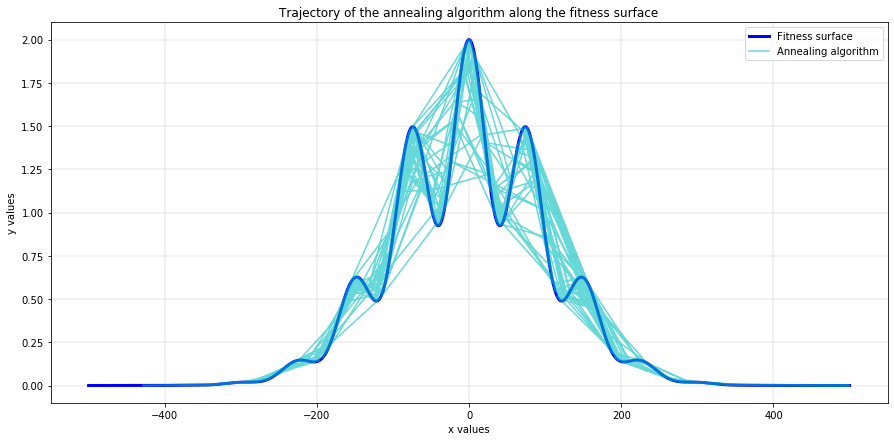

In [8]:
#plot the trajectory of the annealing algorithm along the fitness surface
fig = plt.figure(figsize=(15, 7))
plt.plot(x_val, y_val, color='b', linewidth=3) #Fitness surface
plt.plot(states, costs, color='c', alpha=0.6, linewidth=1.5) #Annealing algorithm
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(color='gray', linestyle='-', linewidth=0.2)
plt.xlabel('x values')
plt.ylabel('y values')
plt.legend(('Fitness surface', 'Annealing algorithm'), loc='upper right')
plt.title("Trajectory of the annealing algorithm along the fitness surface")
plt.show()

In [9]:
def peakPercentage(nbruns = 100):
    """Number of times peak has been spotted."""
    peak_found = 0
    for i in range(nbruns):
        state, cost, states, costs = simulated_annealing(start,
                                                      cost_function, 
                                                      random_neighbour,
                                                      acceptance_probability, 
                                                      temperature, 
                                                      maxsteps=1000, 
                                                      debug=False)
        if cost > 1.75: #1.75 was chosen according to the previous graph
            peak_found += 1
    return peak_found / nbruns * 100

initial_temps = np.linspace(10, 10.3, num=20) 

peak_found = []
for i in initial_temps: 
    temp_init = i
    peak_found.append(peakPercentage())
data = {"Initial temperature": initial_temps, "Peak found %": peak_found}
df = DataFrame(data, columns = ["Initial temperature", "Peak found %"])
print(df)

    Initial temperature  Peak found %
0             10.000000          86.0
1             10.015789          80.0
2             10.031579          89.0
3             10.047368          86.0
4             10.063158          90.0
5             10.078947          82.0
6             10.094737          84.0
7             10.110526          91.0
8             10.126316          82.0
9             10.142105          83.0
10            10.157895          88.0
11            10.173684          85.0
12            10.189474          80.0
13            10.205263          80.0
14            10.221053          84.0
15            10.236842          80.0
16            10.252632          78.0
17            10.268421          80.0
18            10.284211          71.0
19            10.300000          84.0


After running the algorithm 100 times with a set of 20 different temperatures, it looks like the 90% peak is reached at a temperature of 10.063158 and 10.110526.

### Exercise 4

Another informative graph is the plot of all the intermediate best fitnesses versus iteration number. Make this plot. Include the graph in your lab report.

<Figure size 432x288 with 0 Axes>

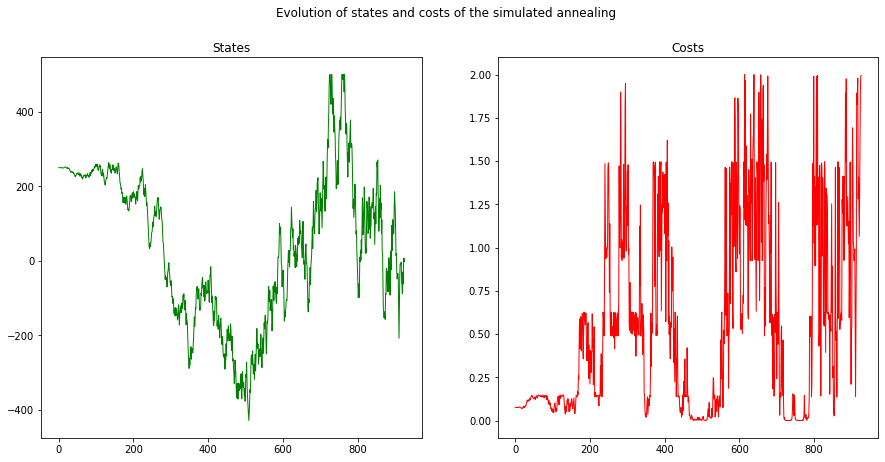

In [10]:
#plot of all the intermediate best fitnesses versus iteration number
plt.figure()
fig = plt.figure(figsize=(15, 7));
plt.suptitle("Evolution of states and costs of the simulated annealing")

plt.subplot(121)
plt.plot(states, color='g', linewidth=1)
plt.title("States")

plt.subplot(122)
plt.plot(costs, color='r', linewidth=1)
plt.title("Costs")

plt.show()

### Exercise 5
*(optional)*

Complete the table below by running simulation 20 times with each of 10 different values of temp shown. Plot number of failures vs temperature and number of iterations to reach the peak vs temperature. Describe and explain any trends you find.